In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import seaborn as sns
from tqdm import tqdm
from datetime import timedelta
pd.options.display.max_columns = 999


## Customers

In [2]:
%%time
customers = pd.read_csv('customer.csv')

CPU times: total: 234 ms
Wall time: 306 ms


In [3]:
# 날짜 데이터를 datetime으로 변경
# 생각해보니 여기 데이터 22년이 마지막이라서 22년을 기준으로 나이를 집계해야하는구나?
customers= customers.assign(birthdate = pd.to_datetime(customers.birthdate))
customers= customers.assign(age = (pd.Timestamp.now().year - customers.birthdate.dt.year))

In [4]:
# 서비스를 이용하는 성별 비중은 여자 64%, 남자 35%
customers.gender.value_counts(normalize=True)
# 평균 나이는 28.5세
customers.age.mean()
# 남 여 모두 평균 나이는 28세
customers.groupby('gender')['age'].mean()

gender
F    28.479355
M    28.582164
Name: age, dtype: float64

## Click_stream_new

In [5]:
%%time
click_stream_new = pd.read_csv('click_stream_new.csv')
click_stream_new.head()

CPU times: total: 14 s
Wall time: 18.4 s


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [6]:
click_stream_new.isna().sum()

session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
product_id         10896445
quantity           10896445
item_price         10896445
payment_status     11981020
search_keywords    11660336
promo_code         12507067
promo_amount       12507067
dtype: int64

In [7]:
# # 라벨 인코딩 X 용량 줄이기
# click_stream_new =click_stream_new.assign(event_time =pd.to_datetime(click_stream_new['event_time']))
# click_stream_new['product_id'] = click_stream_new['product_id'].astype('float32')
# click_stream_new['item_price'] = click_stream_new['item_price'].astype('float32')
# click_stream_new['quantity'] = click_stream_new['quantity'].astype('float32')
# click_stream_new['traffic_source'] = click_stream_new['traffic_source'].astype('category')
# click_stream_new['payment_status'] = click_stream_new['payment_status'].astype('category')
# # click_stream_new = click_stream_new.drop('event_id',axis=1)
# click_stream_new.info()

#### Label Encoding으로 용량 줄이기

In [8]:
# 라벨 인코딩으로  용량 줄이기
from sklearn.preprocessing import LabelEncoder

label_col =['payment_status','traffic_source','event_name']

le1 = LabelEncoder()
le2= LabelEncoder()
le3 = LabelEncoder()


click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())] = le1.fit_transform(click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())])
click_stream_new['traffic_source'] = le2.fit_transform(click_stream_new['traffic_source'])
click_stream_new['event_name'] = le3.fit_transform(click_stream_new['event_name'])


click_stream_new = click_stream_new.assign(event_time=pd.to_datetime(click_stream_new['event_time']) + timedelta(hours=7))
click_stream_new['product_id'] = click_stream_new['product_id'].astype('float32')
click_stream_new['item_price'] = click_stream_new['item_price'].astype('float32')
click_stream_new['quantity'] = click_stream_new['quantity'].astype('float32')
click_stream_new['promo_amount'] = click_stream_new['promo_amount'].astype('float32')
click_stream_new = click_stream_new.drop('event_id',axis=1)

click_stream_new['traffic_source'] = click_stream_new['traffic_source'].astype('int8')
click_stream_new['event_name'] = click_stream_new['event_name'].astype('int8')
click_stream_new.info()


print(le1.classes_)
print(le2.classes_)
print(le3.classes_)

C:\Users\kwon8\AppData\Local\Temp\ipykernel_20104\1087033743.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())] = le1.fit_transform(click_stream_new['payment_status'].loc[~(click_stream_new['payment_status'].isnull())])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       int8   
 2   event_time       object 
 3   traffic_source   int8   
 4   product_id       float32
 5   quantity         float32
 6   item_price       float32
 7   payment_status   object 
 8   search_keywords  object 
 9   promo_code       object 
 10  promo_amount     float32
dtypes: float32(4), int8(2), object(5)
memory usage: 709.9+ MB
['Failed' 'Success']
['MOBILE' 'WEB']
['ADD_PROMO' 'ADD_TO_CART' 'BOOKING' 'CLICK' 'HOMEPAGE' 'ITEM_DETAIL'
 'PROMO_PAGE' 'SCROLL' 'SEARCH']


**퍼널분석**을 위한 각 session_id별 구간에 따른 비율 비교
- 머리로는 HOMEPAGE  -> click -> SCROLL ->add_to_cart -> booking이 맞지 않을까 하는데  add_cart/booking이 비율이 상당히 높음

In [114]:
event_name_index_list = click_stream_new_products.event_name.value_counts().sort_index().index.to_list()
session_cnt = click_stream_new_products['session_id'].nunique()
cpy_idx = event_name_index_list.copy()
cpy_idx.remove(0)
cpy_idx.remove(6)
cpy_idx.remove(5)
cpy_idx.remove(8)

In [104]:
# 전체 event_name에 따른 퍼널 분석?
for num in (event_name_index_list ):
    event_session_cnt = click_stream_new_products[click_stream_new_products.event_name == num]['session_id'].nunique()
    event_session_percentage = event_session_cnt / session_cnt
    print(f'{le3.classes_[num]} : {event_session_percentage:.3f}')

ADD_PROMO : 0.365
ADD_TO_CART : 0.974
BOOKING : 0.952
CLICK : 0.750
HOMEPAGE : 1.000
ITEM_DETAIL : 0.582
PROMO_PAGE : 0.392
SCROLL : 0.640
SEARCH : 0.548


In [115]:
# 원하는 퍼널만 보기 
import operator  # dict에서 정렬을 위한 라이브러리
temp_dict={}
for num in (cpy_idx ):
    event_session_cnt = click_stream_new_products[click_stream_new_products.event_name == num]['session_id'].nunique()
    event_session_percentage = event_session_cnt / session_cnt
    event_name = le3.classes_[num]
    temp_dict[event_name] = round(event_session_percentage, 3)
    # print(f'{le3.classes_[num]} : {event_session_percentage:.3f}')

temp_dict = sorted(temp_dict.items(), key=operator.itemgetter(1),reverse=True)
temp_dict

[('HOMEPAGE', 1.0),
 ('ADD_TO_CART', 0.974),
 ('BOOKING', 0.952),
 ('CLICK', 0.75),
 ('SCROLL', 0.64)]

In [9]:
# temp.to_csv('click_stream_light.csv',index=False)

## Product

In [11]:
products = pd.read_csv('product.csv', on_bad_lines='skip')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [12]:
products.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [13]:
products.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [14]:
products.usage.value_counts()

usage
Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64

In [15]:
products.masterCategory.value_counts()

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

## Transaction_new

In [16]:
transaction_new = pd.read_csv('transaction_new.csv')
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [17]:
transaction_new.isna().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [18]:
transaction_new.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


## merge click_stream + product

In [19]:
click_stream_new_products = click_stream_new.merge(products, how='left' , left_on='product_id', right_on='id')

In [20]:
click_stream_new_products = click_stream_new_products.drop('id',axis =1)

In [21]:
click_stream_new_products.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,4,2019-09-06T15:54:32.821085Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,7,2019-09-06T16:03:57.821085Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,4,2019-09-01T12:05:10.322763Z,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,1,2019-09-01T12:06:33.322763Z,0,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,ADIDAS Men Eqt Nitro Fashion Black Sports Shoes
4,7d440441-e67a-4d36-b324-80ffd636d166,2,2019-09-01T12:15:29.425431Z,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cus_transaction = transaction_new.merge(customers, how='inner', on ='customer_id')
cus_transaction.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,24
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28


In [23]:
cus_transaction[cus_transaction.payment_status != 'Success'][['payment_method','promo_code','product_id']]
fail_idx = cus_transaction[cus_transaction.payment_status != 'Success']['product_id'].value_counts().index
fail_idx

Index([55469,  8696, 23056, 54619, 44503, 48478, 31727, 21178, 18599, 44091,
       ...
       35324,  9558, 13562, 13156, 11343,  5890,  4021, 27012,  4781, 28332],
      dtype='int64', name='product_id', length=31236)

In [24]:
products

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [25]:
# 결제를 한 사람들의 나이도 28살~
cus_transaction[cus_transaction.payment_status == 'Success']['age'].mean()

# 결제를 한 사람들의 남 여 비중도 customers의 남여 비중과 차이 나지 않음.  여자 63, 남자 36퍼~
cus_transaction[cus_transaction.payment_status == 'Success']['gender'].value_counts(normalize=True)

gender
F    0.637819
M    0.362181
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='gender'>

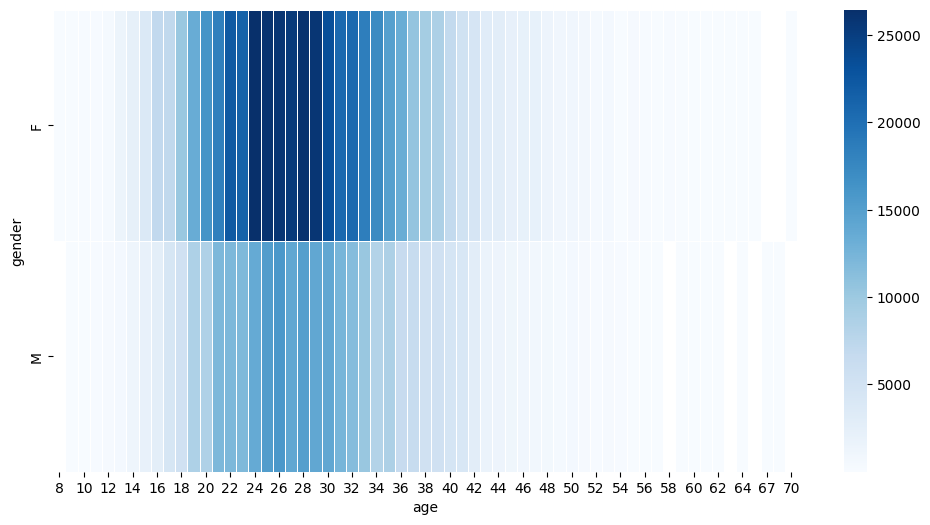

In [26]:
# 구매를 한 사람들 중에서 프로모션의 참여 여부에 따른 나이,성별의 차이는 없당~ 
success_df= cus_transaction[cus_transaction.payment_status == 'Success']
heatmap_data= success_df[success_df['promo_code'].isnull()].groupby('age')['gender'].value_counts().to_frame().reset_index().pivot(index='gender',columns='age',values='count')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,linewidths=0.5 , cmap='Blues')

In [27]:
# 구매를 한 사람들은 credit Card가 35퍼 , gopay가 20퍼 ovo가 19퍼, debit Card가 16퍼로 나름 균등하게 나옴.
# 구매를 한 사람들중에 프로모션을 참여한 사람들의 지불 방법에도 큰 차이가 없다.
 
success_df.payment_method.value_counts(normalize=True)*100
success_df[~success_df['promo_code'].isnull()].payment_method.value_counts(normalize=True)*100

payment_method
Credit Card    34.939725
Gopay          20.055275
OVO            19.911448
Debit Card     16.160886
LinkAja         8.932666
Name: proportion, dtype: float64

In [28]:
success_df[~success_df['promo_code'].isnull() ] 

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,24
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363824,181865,59620,1,183234,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757,12282,1,364776,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,53051,1,292052,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
10,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,46352,1,241945,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254575,2022-07-07T09:48:29.144627Z,99675,1849df71-943e-431d-8731-35b75670203a,0aa7c9aa-517e-4c79-b691-137861f4e9af,Credit Card,Success,3388,XX2022,0,2022-07-12T23:34:17.670587Z,-8.093308,110.709094,485334,35318,1,488722,Laila,Pudjiastuti,b12282d0-f890-41b3-977e-43a7f89b95c1,b12282d0_f890_41b3_977e_43a7f89b95c1@startupca...,F,1991-08-17,iOS,9355cb0c-f300-42ce-a9d3-8a65b2f957a7,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,-8.093308,110.709094,Yogyakarta,Indonesia,2022-05-06,33
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213,Salwa,Prastuti,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,46d47eaa_4d8a_4f17_b083_48c2ad4fe947@zakyfound...,F,2006-04-21,Android,582053d8-d444-427b-9e9a-e12bbc54b1d8,Android 2.3,-2.266407,120.415779,Sulawesi Selatan,Indonesia,2021-12-08,18
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835,Tania,Palastri,f09d115a-a9

In [29]:
# 다양한 지불 방법을 한 사람이 사용함.
# 프로모션에 따라서 결제 방법이 다른가 싶었지만 그건 아니였다.
# 프로모션에 따라서 할인 되는 금액이 다른데 그 기준을 아직 모르겠음 
# 뭐이리 많이 구매했을까 이 사람은... 
success_df[(~success_df['promo_code'].isnull() )& (success_df['customer_id'] == 4774)].sort_values('created_at').drop_duplicates('created_at')

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363824,181865,59620,1,183234,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,-6.126016,106.779552,370757,12282,1,364776,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,-0.992004,114.438739,1295740,53051,1,292052,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
17,2019-12-29T11:54:05.365620Z,4774,01e4aedf-c297-4404-992a-1c9756f19ad9,7a134594-54ed-447a-a87d-a67bea47e109,Credit Card,Success,6208,LIBURDONG,10000,2020-01-03T04:09:43.221514Z,-7.118592,113.312235,249616,25734,1,245824,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
24,2020-04-01T11:56:48.365620Z,4774,b60b524e-f624-41d1-8984-febfd5d0097e,42e91872-d1d5-44a5-925f-8532cee92d37,Credit Card,Success,5911,AZ2022,5000,2020-04-07T01:10:52.225190Z,-3.602334,120.363824,464824,41455,1,139673,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
32,2021-02-24T10:35:41.365620Z,4774,3e8d1505-80ad-4438-a82b-2a017e0c551e,57b6d108-9ec4-48ef-8d66-cdd17c4942ba,Gopay,Success,3855,BUYMORE,10000,2021-02-28T20:19:37.594671Z,-7.341194,106.593658,213809,11599,1,207664,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
35,2021-07-15T11:06:17.365620Z,4774,57b61173-4837-449a-a5fb-22b0cd07d56d,b0ab036c-5c29-417b-9c2e-1a41d872028a,LinkAja,Success,6325,AZ2022,10000,2021-07-17T19:21:39.314719Z,-3.122690,126.418906,75865,18001,1,72190,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
38,2021-10-17T11:45:13.365620Z,4774,6a32b1ef-142a-41f8-8046-f9b74676233d,ced773bd-a755-4e23-a1ab-4a96ef9c75e1,Credit Card,Success,2752,WEEKENDSERU,10000,2021-10-22T05:58:33.933514Z,-7.502613,108.741192,450657,2334,1,443409,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.3

In [30]:
dup_idx = success_df[success_df.duplicated(['booking_id','created_at','session_id','promo_amount'])].index
success_df= success_df.drop(dup_idx).sort_values(['customer_id','created_at'])
success_df

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
352123,2018-08-25T18:54:03.844494Z,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,2018-08-27T05:08:15.817545Z,-6.151858,106.945839,826597,56019,5,166934,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,38
352124,2018-09-22T18:42:52.844494Z,3,f9b17de8-5db3-40dc-9227-664c6679543c,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,NaN,10000,2018-09-25T19:14:55.732974Z,-8.710879,122.178317,163784,30235,1,153784,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,38
352125,2018-10-20T19:07:54.844494Z,3,caa8be57-6239-4b5b-ae0b-e27887a13356,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,2018-10-26T05:26:58.264371Z,-8.391546,115.345669,124932,7808,1,123760,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,38
352126,2018-11-17T19:09:49.844494Z,3,688cef52-8ee7-44ea-98af-20daf0c5609b,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,2018-11-21T05:06:08.279671Z,-6.151858,106.945839,247902,48968,1,251317,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,38
352127,2018-12-15T19:33:50.844494Z,3,a12fb778-d19a-4559-9808-8115f01c1595,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,2018-12-18T21:15:53.089926Z,-0.988670,109.794413,181237,59272,1,173882,Ganep,Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,106.945839,Jakarta Raya,Indonesia,2018-08-25,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336570,2020-07-15T19:24:07.703960Z,99998,0d102b41-78e1-4c46-81d2-eff6f725fc2a,4c018e81-af7a-429b-8aad-e182c312079a,Credit Card,Success,0,NaN,10000,2020-07-20T14:54:54.909840Z,-6.180098,106.940731,534337,37952,1,137662,Tami,Fujiati,eaecfca2-11c8-4714-9bf0-6a8e0dbc24da,eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...,F,2014-05-21,Android,e74adfb1-142f-411d-a34a-e306edffd19d,Android 3.2.3,-4.092411,105.179376,Lampung,Indonesia,2018-07-01,10
336572,2021-01-17T21:22:28.703960Z,99998,d7a09532-f774-4528-9d6e-be9ef2d67bef,11f2cef4-901a-4bec-b691-bfa32fa70f4d,Credit Card,Success,8569,WEEKENDMANTAP,10000,2021-01-18T22:14:42.544695Z,-7.735830,111.117437,366178,36564,1,364747,Tami,Fujiati,eaecfca2-11c8-4714-9bf0-6a8e0dbc24da,eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...,F,2014-05-21,Android,e74adfb1-142f-411d-a34a-e306edffd19d,Android 3.2.3,-4.092411,105.179376,Lampung,Indonesia,2018-07-01,10
336573,2021-07-22T22:33:46.703960Z,99998,0361a084-9362-4a93-b940-d59e7ce91970,19d9eda5-1a4c-43b4-8f38-0b6b5c00841c,Debit Card,Success,0,NaN,0,2021-07-25T02:09:59.898911Z,-4.092411,105.179376,485330,4044,2,242665,Tami,Fujiati,eaecfca2-11c8-4714-9bf0-6a8e0dbc24da,eaecfca2_11c8_4714_9bf0_6a8e0dbc24da@zakyfound...,F,201

In [31]:
cus_transaction.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,24
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,28


In [32]:
cus_transaction = cus_transaction.assign(created_at=pd.to_datetime(cus_transaction['created_at']))                             

In [33]:
end_time = cus_transaction.sort_values('created_at').iloc[-1]['created_at']
cus_transaction = cus_transaction.assign(time_diff=end_time-cus_transaction['created_at'])
cus_transaction.time_diff

0         1463 days 08:37:44.363276
1         1462 days 11:19:23.455849
2         1415 days 12:08:28.455849
3         1368 days 12:35:57.455849
4         1321 days 12:39:15.455849
                     ...           
1254580    313 days 01:49:40.746596
1254581    234 days 16:24:27.599423
1254582    232 days 22:39:08.876876
1254583    956 days 12:58:36.198087
1254584    955 days 11:12:31.120254
Name: time_diff, Length: 1254585, dtype: timedelta64[ns]

In [34]:
cus_transaction.time_diff.describe()

count                        1254585
mean     654 days 04:18:21.313088184
std      504 days 05:13:42.419013952
min                  0 days 00:00:00
25%         234 days 23:51:27.925579
50%         535 days 06:36:34.960172
75%      985 days 03:34:07.770532992
max        2222 days 00:41:01.028564
Name: time_diff, dtype: object

In [35]:
last_access_time_by_customer= cus_transaction.groupby('customer_id')['created_at'].max().to_frame().reset_index()
last_access_time_by_customer= last_access_time_by_customer.rename(columns={'created_at':'last_access_time'})
last_access_time_by_customer = last_access_time_by_customer.assign(time_diff=end_time-last_access_time_by_customer['last_access_time'])
last_access_time_by_customer.time_diff.describe()

count                          50705
mean     299 days 14:18:44.391237272
std      436 days 04:15:27.167847832
min                  0 days 00:00:00
25%          39 days 03:33:33.870188
50%         110 days 02:18:59.972104
75%         359 days 20:22:07.077138
max        2221 days 01:27:00.603069
Name: time_diff, dtype: object

In [36]:
# 정규 표현식 regexp
import re

diff_list = []
for entry in last_access_time_by_customer['time_diff']:
    days_str = str(entry)  # Timedelta 객체를 문자열로 변환 -> days 앞 날짜만 추출하기 위함.
    days = re.search(r'(\d+) days', days_str)
    if days:
        diff_list.append(int(days.group(1)))

diff_list = pd.DataFrame(diff_list)
diff_list = diff_list.rename(columns={0 : 'date_diff'})
diff_list

,date_diff
0,35
1,77
2,64
3,146
4,207
...,...
50700,67
50701,2
50702,827
50703,187
